# SPDA SUMMATIVE ASSESSMENT QUESTION 2


## Webscrapping Using Reddit API


#### Where does the data come from?

The data was gotten through the Reddit website, under the subreddit health (r\health) - The data consists of all the health topic being discussed on the forum from 10/2/2024 - 11/15/2024.

#### Aim of study

The aim of this analysis is to identify the key topics and drivers of engagement in the subreddit(health) on the reddit platform.

In this analysis we will explore:
1. The most dicussed health topics.
2. Understand what drives high engagement.
3. Analyse the contribution patterns of authors which in this case are news rooms like nbc news, ctvnews etc

#### What are the variables of interest?

The variables of interst include: 

1. Title: The headline of the Reddit post that explains what the post is about.
2. Author: The Reddit username of the person who wrote the post which in the case are news rooms - nbc news, ctvnews etc.
3. Date: The day the topic was submitted on the forum.
4. Score: The total upvotes minus downvotes the post has received, showing how well the post was liked by the community.
5. Number of Comments (num_comments): The total number of comments made on the post, showing how much discussion it generated.


#### How was the data scrapped/collected?

To scrape data from the Reddit API, I first open a reddit account, then I registered for API credentials via Reddit's developer portal. I got my client_id, client_secret and user_agent after the registration.

Praw was installed using "pip install praw" to enable scrapping from the Reddit website. Praw is a Python wrapper for the Reddit API, which makes authentication and JSON parsing easy.

Then I authenticated using client_id, client_secret, and user_agent.

After that, I used reddit.subreddit('health') to fetch the health post data. 


In [359]:
import praw

#Authentication
reddit = praw.Reddit(
    client_id="5Wv14SUqGs8ETZ8inzjcMg",
    client_secret="0zUUYuMLM2vBe2-XVIExAqochF5gQQ",
    user_agent="windows:my_app:1.0 (by /u/Life_Hat1137)",
    username="Life_Hat1137",  # Your Reddit username
    password="Ola07061193131"  # Your Reddit password
)

print("Authenticated as:", reddit.user.me())


Authenticated as: Life_Hat1137


#### Step 2 - Perform data preparation/cleaning

In [361]:
import praw
import pandas as pd
import arrow

#Submission data
health_submissions = []

#Submissions r/health
for submission in reddit.subreddit('health').hot(limit=500):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    d['author'] = submission.author.name if submission.author else None
    d['subreddit'] = submission.subreddit.display_name
    
    # Convert created_utc to clear date WITH arrow
    d['date'] = arrow.get(submission.created_utc).format('YYYY-MM-DD')
    
    health_submissions.append(d)

Load the data set into a dataframe using pandas and save data set as a CSV file

In [363]:
df = pd.DataFrame(health_submissions)

print(df.head())

df.to_csv('health_reddit_data_with_dates_arrow.csv', index=False)

        id                                              title  num_comments  \
0  1gv8boy  Trump picks TV personality and former Senate c...           202   
1  1gvdcsz  Mehmet Oz Backed Massive Change to Medicare Th...            51   
2  1gv7r38  Tom's of Maine toothpaste made with bacteria-t...            15   
3  1gvm9h4  Opinion | Vaccines Have Saved Millions of Live...             3   
4  1gv8x8x  Trump chooses TV doctor Mehmet Oz to lead Cent...            49   

   score  upvote_ratio        domain  gilded  num_crossposts   nsfw  \
0    731          0.95   nbcnews.com       0               0  False   
1    254          0.97  newsweek.com       0               0  False   
2    245          0.98   cbsnews.com       0               0  False   
3     19          0.88   nytimes.com       0               0  False   
4    119          0.93    ctvnews.ca       0               0  False   

           author subreddit        date  
0         nbcnews    Health  2024-11-19  
1         newz

PermissionError: [Errno 13] Permission denied: 'health_reddit_data_with_dates_arrow.csv'

In [66]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 398
Number of columns: 12


In [68]:
health_reddit = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

In [70]:
health_reddit

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
0,1gt35fn,Texas follows Louisiana’s lead to reclassify r...,38,486,0.96,lailluminator.com,0,0,False,newzee1,Health,2024-11-17
1,1gtgfal,"When muscles work out, they help neurons to gr...",3,19,0.95,news.mit.edu,0,0,False,BlitzOrion,Health,2024-11-17
2,1gt68zo,H5N1 bird flu infects six more humans in Calif...,3,99,0.99,latimes.com,0,0,False,thinkB4WeSpeak,Health,2024-11-17
3,1gsv128,Nutritionist explains why you’re probably eati...,123,303,0.88,news.harvard.edu,0,2,False,Sariel007,Health,2024-11-16
4,1gsmvym,Vaccine shows promise against aggressive breas...,14,465,0.99,medicine.washu.edu,0,0,False,F0urLeafCl0ver,Health,2024-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1fwb5jk,Scientists may have found the reason why peopl...,6,55,0.93,statnews.com,0,0,False,TylerFortier_Photo,Health,2024-10-04
413,1fwkkcb,Bird Flu Fears Stoke the Race for an mRNA Flu ...,1,9,0.90,wired.com,0,0,False,F0urLeafCl0ver,Health,2024-10-05
414,1fwpipv,EU/EEA travellers advised to exercise caution ...,0,3,1.00,ecdc.europa.eu,0,0,False,boppinmule,Health,2024-10-05
415,1fvxrzl,Scientists in UK developing world's first ovar...,1,143,1.00,euronews.com,0,1,False,euronews-english,Health,2024-10-04


In [72]:
health_reddit.columns

Index(['id', 'title', 'num_comments', 'score', 'upvote_ratio', 'domain',
       'gilded', 'num_crossposts', 'nsfw', 'author', 'subreddit', 'date'],
      dtype='object')

In [29]:
health_reddit.describe(include= 'all')

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
count,417,417,417.000000,417.000000,417.000000,417,417.0,417.000000,417,417,417,417
unique,417,414,NaN,NaN,NaN,114,NaN,NaN,2,112,1,45
top,1gt35fn,Sleepy during the day? You may be at higher ri...,NaN,NaN,NaN,nbcnews.com,NaN,NaN,False,nbcnews,Health,2024-10-22
freq,1,2,NaN,NaN,NaN,30,NaN,NaN,416,26,417,18
mean,NaN,NaN,25.839329,175.865707,0.919544,NaN,0.0,0.167866,NaN,NaN,NaN,NaN
std,NaN,NaN,47.085189,222.785591,0.105812,NaN,0.0,0.433704,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.190000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,33.000000,0.900000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.000000,89.000000,0.950000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,30.000000,243.000000,0.980000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN


In [50]:
health_reddit.author.value_counts()

author
nbcnews                26
euronews-english       21
Maxcactus              19
nytopinion             18
CTVNEWS                18
                       ..
techreview              1
sorryDontUnderstand     1
Specific-Ad7048         1
Diazepam                1
Lighting                1
Name: count, Length: 112, dtype: int64

Ignore rows that the authors have just one title discussion each -
indig0sixalpha, sullie363, Sothern_Opposit747, shinybrighyhings, LosFelizCB.

### Step 2: Perform Data Preparation And Cleaning

#### Steps to prepare, clean your data, or extract new features

The following steps were taken to prepare and clean the data.
1. Identifying if there are any missing data, fortunately there was none.
2. Removing unwanted columns.
3. Checking for outliers.
4. Converting all uppercase words to lowercase to improve consistency across the data and to simplify other steps in the data pipeline, like tokenization, stopword removal, and lemmatization.
5. I used `re` for text cleaning, `stopwords` to remove common words, `word_tokenize` for splitting text into words, and `WordNetLemmatizer` for standardizing word forms, enhancing data consistency and analysis.
6. The clean data was saved as a new csv file.

#### Missing data

The data showed no missing values.

In [52]:
#Missing values
print(df.isnull().sum()) 

id                0
title             0
num_comments      0
score             0
upvote_ratio      0
domain            0
gilded            0
num_crossposts    0
nsfw              0
author            0
subreddit         0
date              0
dtype: int64


The step involves the removal of unwanted columns

In [76]:
# Remove unwanted columns
columns_to_drop = ['nsfw', 'gilded', 'num_crossposts', 'domain', 'upvote_ratio']  # Example columns to drop
health_reddit.drop(columns=columns_to_drop, inplace=True
print(health_reddit.columns)

Index(['id', 'title', 'num_comments', 'score', 'author', 'subreddit', 'date'], dtype='object')


#### Checking for outliers

The scatterd plot highlights if there is an outliers in the score and comment variable. The result however shows no outliers.

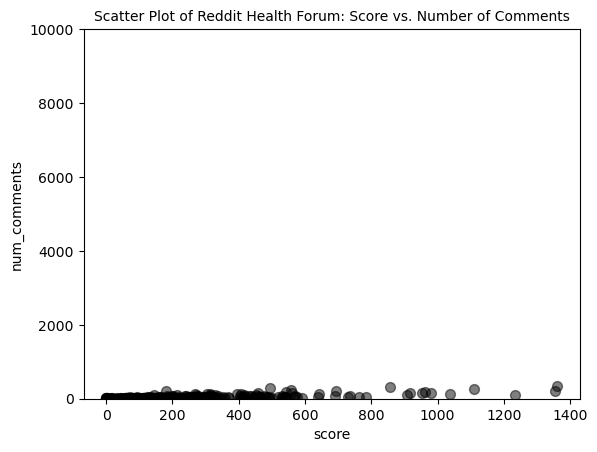

In [403]:
# Create the scatter plot
ax = health_reddit.plot.scatter(x='score', y='num_comments', s=50, c='k', alpha=0.5)

# Set the y-axis limits
ax.set_ylim(0, 10000)  # Limit y-axis from 0 to 10,000
ax.set_title('Scatter Plot of Reddit Health Forum: Score vs. Number of Comments', fontsize=10)
plt.show()

Changing uppercase words to lowercase in the dataset this is important to improve the consistency of the dataset and reduce duplicates.

In [409]:
# Convert all words in the 'title' column to lowercase
health_reddit['clean_title'] = health_reddit['title'].str.lower()

# Convert the 'author' column to lowercase
health_reddit['clean_author'] = health_reddit['author'].str.lower()
print(health_reddit[['clean_title', 'clean_author']].head())


                                         clean_title    clean_author
0  texas follows louisiana’s lead to reclassify r...         newzee1
1  when muscles work out, they help neurons to gr...      blitzorion
2  h5n1 bird flu infects six more humans in calif...  thinkb4wespeak
3  nutritionist explains why you’re probably eati...       sariel007
4  vaccine shows promise against aggressive breas...  f0urleafcl0ver


#### Additionl step

I used re, nltk libraries to clean text data by removing special characters, stopwords, tokenizing, and lemmatizing words for analysis.

In [418]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and apply lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply the cleaning function to the text columns
health_reddit['clean_title_1'] = health_reddit['clean_title'].apply(clean_text)
health_reddit['clean_author_1'] = health_reddit['clean_author'].apply(clean_text)

# View the cleaned columns
print(health_reddit[['clean_title_1', 'clean_author_1']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                       clean_title_1 clean_author_1
0  texas follows louisiana lead reclassify reprod...         newzee
1        muscle work help neuron grow new study show     blitzorion
2    hn bird flu infects six human california oregon  thinkbwespeak
3  nutritionist explains youre probably eating wa...         sariel
4      vaccine show promise aggressive breast cancer   furleafclver


In [422]:
cleaned_data_new = health_reddit[['id', 'num_comments','score','clean_author_1','date', 'clean_title_1']].copy()

In [424]:
cleaned_data.to_csv('cleaned_health_reddit_data_new.csv', index=False)

In [426]:
clean_data = pd.read_csv('cleaned_health_reddit_data_new.csv')

In [430]:
clean_data

,id,num_comments,score,clean_author,date,clean_title
0,1gt35fn,38,486,newzee,2024-11-17,texas follows louisiana lead reclassify reprod...
1,1gtgfal,3,19,blitzorion,2024-11-17,muscle work help neuron grow new study show
2,1gt68zo,3,99,thinkbwespeak,2024-11-17,hn bird flu infects six human california oregon
3,1gsv128,123,303,sariel,2024-11-16,nutritionist explains youre probably eating wa...
4,1gsmvym,14,465,furleafclver,2024-11-16,vaccine show promise aggressive breast cancer
...,...,...,...,...,...,...
412,1fwb5jk,6,55,tylerfortierphoto,2024-10-04,scientist may found reason people schizophreni...
413,1fwkkcb,1,9,furleafclver,2024-10-05,bird flu fear stoke race mrna flu vaccine
414,1fwpipv,0,3,boppinmule,2024-10-05,eueea traveller advised exercise caution visit...
415,1fvxrzl,1,143,euronewsenglish,2024-10-04,scientist uk developing world first ovarian ca...


In [440]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the column
health_reddit['sentiment'] = health_reddit['title'].apply(get_sentiment)

# Display the updated DataFrame
print(health_reddit[['title', 'sentiment']])



                                                 title  sentiment
0    Texas follows Louisiana’s lead to reclassify r...   0.000000
1    When muscles work out, they help neurons to gr...   0.136364
2    H5N1 bird flu infects six more humans in Calif...   0.500000
3    Nutritionist explains why you’re probably eati...   0.200000
4    Vaccine shows promise against aggressive breas...   0.000000
..                                                 ...        ...
412  Scientists may have found the reason why peopl...   0.000000
413  Bird Flu Fears Stoke the Race for an mRNA Flu ...   0.000000
414  EU/EEA travellers advised to exercise caution ...   0.000000
415  Scientists in UK developing world's first ovar...   0.250000
416  Is bird flu spreading in people? Without blood...   0.000000

[417 rows x 2 columns]


### Step 3 - Exploratory Data analysis


##### Calculate the sum of num_comments and score.

In [456]:
df = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

total_sum = df['num_comments'].sum()
print("Sum of num_comments:", total_sum)

total_counts = df['score'].sum()
print("Sum of score:", total_counts)


Sum of num_comments: 10775
Sum of score: 73336


This result shows that:
1. The total comments made on the subreddit health post between 10/2/2024 - 11/15/2024 is 10775.
2. The total upvotes on the subreddit health forum between 10/2/2024 - 11/15/2024 is 73336

##### Calculate the means of num_comments, score.

In [525]:
data = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

mean_comments = data['num_comments'].mean()
print("Mean num_comments:", mean_comments)

mean_score = data['score'].mean()
print("Mean score:", mean_score)

Mean num_comments: 25.839328537170264
Mean score: 175.86570743405275


This result shows that:
1. The average number of comments per post is 25.839328537170264
2. The average engagement per post is 175.86570743405275

##### Calculate the range of num_comments, score.

In [461]:
range_comments = data['num_comments'].max() - data['num_comments'].min()
print("Range num_comments is", range_comments)

range_score = data['score'].max() - data['score'].min()
print("Range score:", range_score)

Range num_comments is 346
Range score: 1361


This shows that:
1. The range of comments shows the difference in engagemets, not all post had same number of engagements, some where more engaging than others.
2. The range of score shows a differnce in the popularity of the various discussion topics

##### Calculate the standard deviation of the num_commnents and the score.

In [463]:
standard_deviation_comments = data["num_comments"].std()
print("Standard_deviation_comments:", standard_deviation_comments)

standard_deviation_score = data["score"].std()
print("standard_deviation_score:",standard_deviation_score)



Standard_deviation_comments: 47.08518862667526
standard_deviation_score: 222.7855906968731


This shows that: 
1. The stanadard deviation of comments shows that most posts have a similar number of comments.
2. The standard deviation of score shows that the most post have scores close to average

#### Histograms

From the histograms below:

1. The post scores and number of comments highlights that certain posts gain much higher engagement compared to others.
2. Some posts went viral while most others did not.

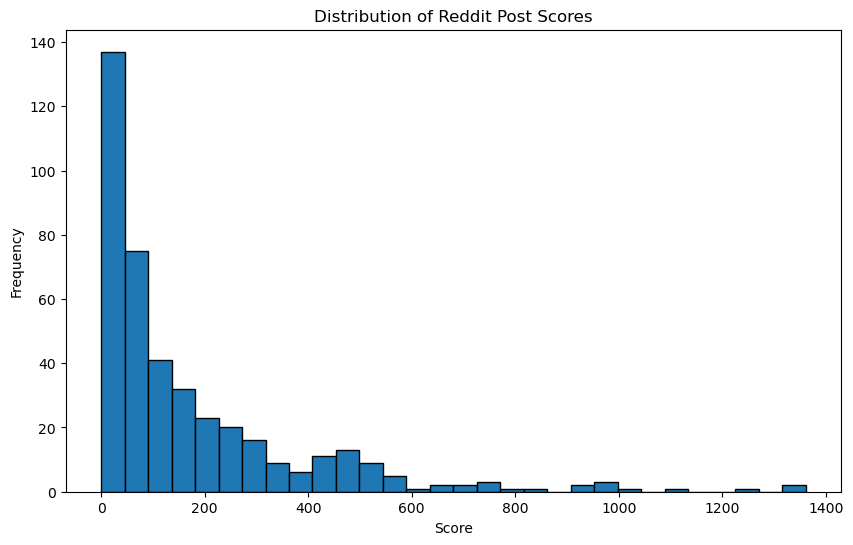

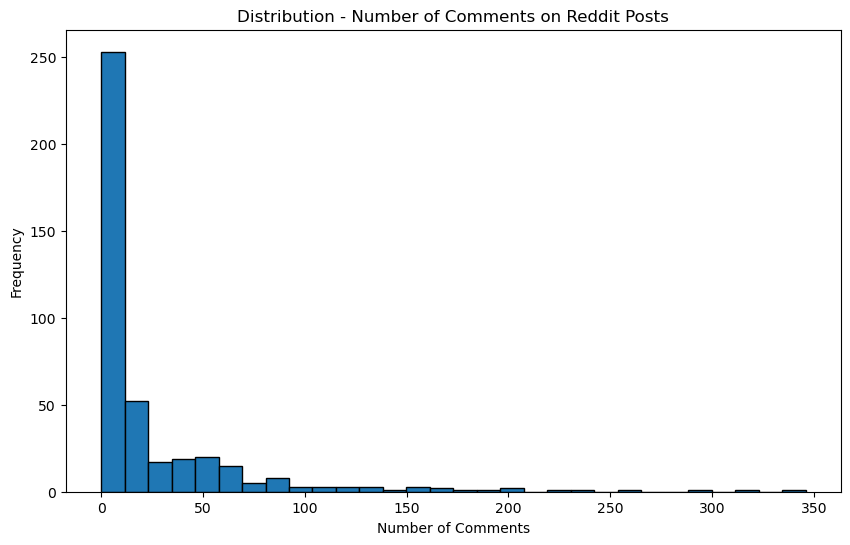

In [558]:
# Plot a histogram for the 'score' column
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=30, edgecolor='black')
plt.title('Distribution of Reddit Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for the 'num_comments' column
plt.figure(figsize=(10, 6))
plt.hist(df['num_comments'], bins=30, edgecolor='black')
plt.title('Distribution - Number of Comments on Reddit Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


In the histogram below we looked at the distribution of score across posts that contain key words - 'vaccine', 'cancer', 'outbreak', 'mental health', 'abortion

From the histogram we see that there is an unequal score across the individual posts with the unique key words. This highlights that some topics got more enegagements that others.

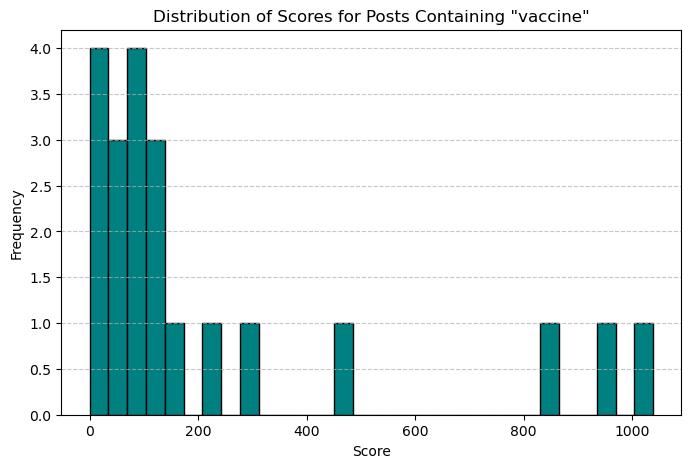

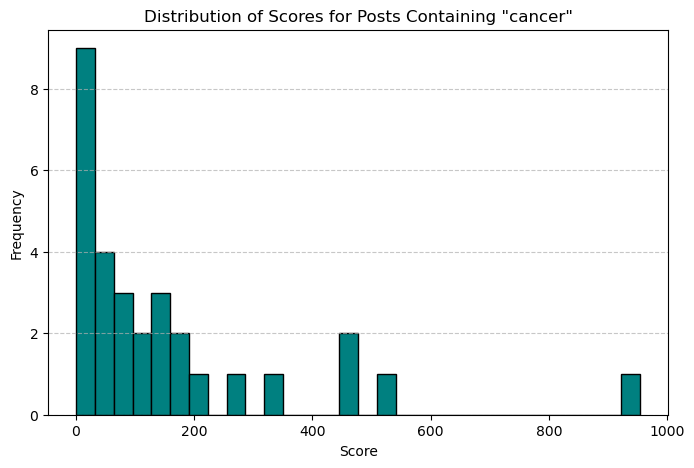

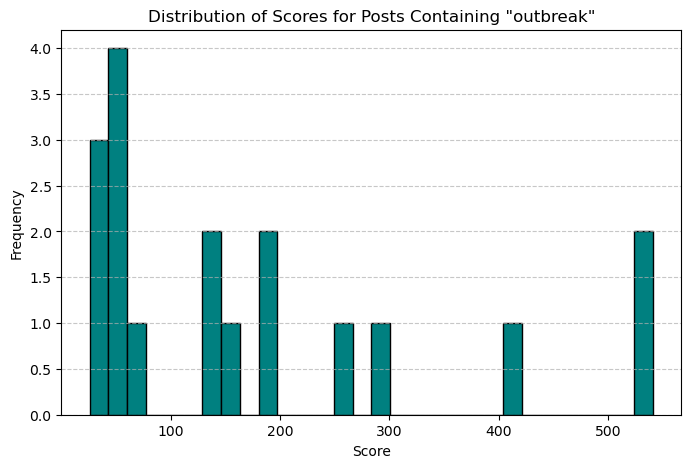

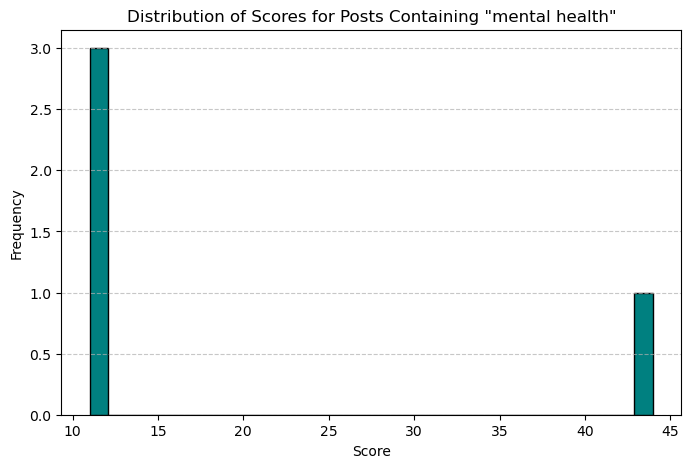

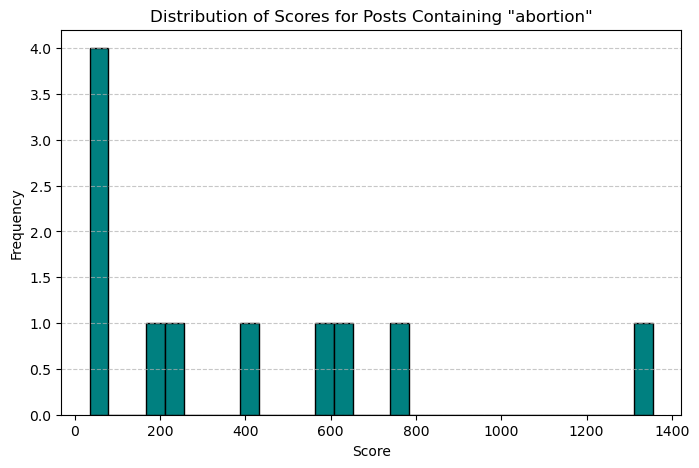

In [491]:
keywords = ['vaccine', 'cancer', 'outbreak', 'mental health', 'abortion']

for keyword in keywords:
    keyword_data =clean_data[clean_data['clean_title'].str.contains(keyword, case=False, na=False)]
    plt.figure(figsize=(8, 5))
    plt.hist(keyword_data['score'], bins=30, color='teal', edgecolor='black')
    plt.title(f'Distribution of Scores for Posts Containing "{keyword}"')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

The histogram below shows a Logarithmic Histogram for Score and Number of Comments.
The result shows us a clearer view of the patterns of engagement across topic and highlights the fact that more post are more engaging than others.

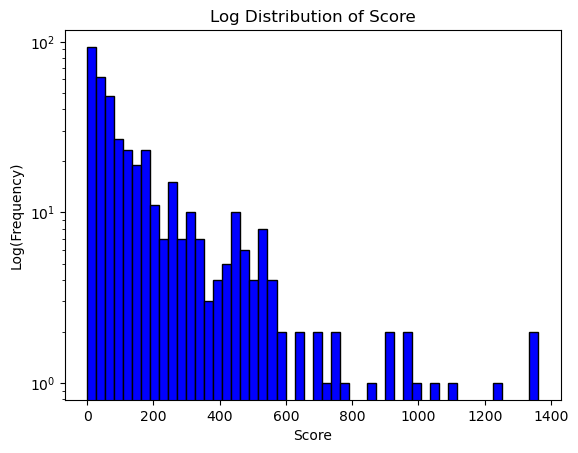

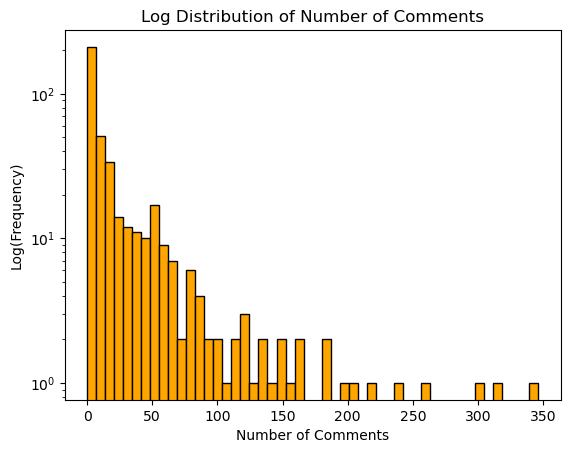

In [577]:
plt.hist(df['score'], bins=50, color='blue', edgecolor='black', log=True)
plt.title('Log Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Log(Frequency)')
plt.show()

plt.hist(df['num_comments'], bins=50, color='orange', edgecolor='black', log=True)
plt.title('Log Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Log(Frequency)')
plt.show()



#### Scatter plots

From the scattered plot below:

1. The regression line shows a positive correlation between scores and number of comments.

2. Posts with higher scores tend to have more comments but the relationship is not perfect.

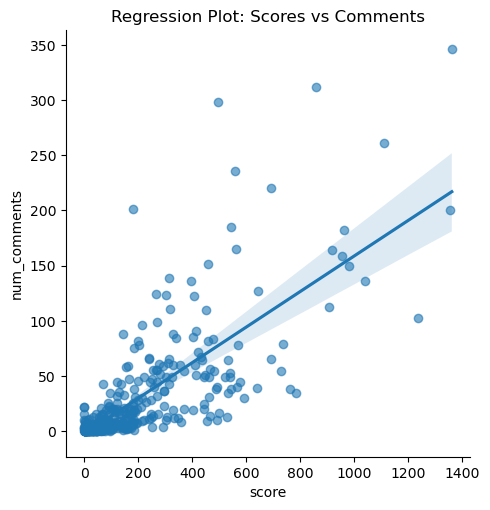

In [307]:
import seaborn as sns
sns.lmplot(x='score', y='num_comments', data=clean_data, scatter_kws={'alpha': 0.6})
plt.title('Regression Plot: Scores vs Comments')
plt.show()


The scattered plot below shows that some authors have more engagememts than others. Most authors have posts at lower scores under 200.
Few authors have very high-scoring posts with points above 800.

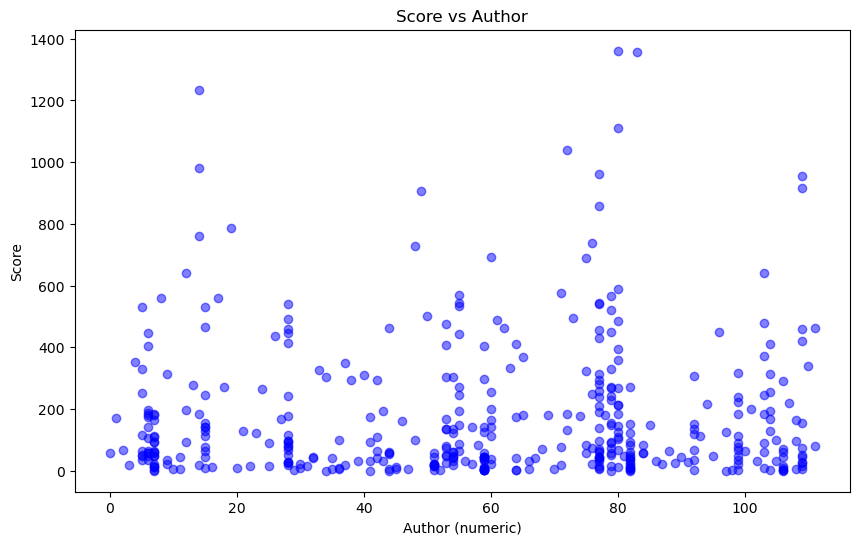

In [588]:
#Calculate the number of posts per author
author_post_count = df['author'].value_counts().reset_index()
author_post_count.columns = ['author', 'num_posts']

# Merge with the original dataframe to have the 'num_posts' column for each row
df = df.merge(author_post_count, on='author', how='left')

# Convert 'author' to numeric (since correlation needs numerical data)
df['author_numeric'] = df['author'].astype('category').cat.codes

# Scatter plot 1: Score vs Author (numeric)
plt.figure(figsize=(10, 6))
plt.scatter(df['author_numeric'], df['score'], color='blue', alpha=0.5)
plt.title('Score vs Author')
plt.xlabel('Author (numeric)')
plt.ylabel('Score')
plt.show()


###### Here, we try to check the highest occuring words in the topics found in our data set.
The top 10 highest occuring words are:
1. Health
2. Study
3. New
4. Say
5. Cancer
6. U
7. Drug
8. Flu
9. Risk
10. Find

In [234]:
from collections import Counter

all_words = ' '.join(clean['clean_title']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(10))


[('health', 55), ('study', 39), ('new', 38), ('say', 31), ('cancer', 29), ('u', 28), ('drug', 25), ('flu', 25), ('risk', 24), ('find', 23)]


#### Wordcloud

The wordcloud below highlights the most frequently used words in the topics discussed in the data set.

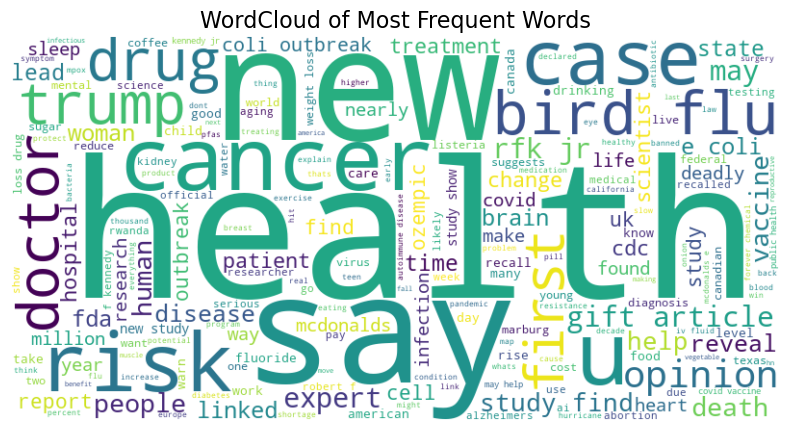

In [600]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Create the plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Frequent Words', fontsize=16)
plt.show()


#### Bar charts

The bar chart below shows the top authors with the highest number of posts between 10/2/2024 - 11/15/2024 

Nbcnews had the highest number of posts,followed by euronewswnglish, maxcactus, nytopinion, ctvnews, newsweek, newzee, cbsnews, statnews and wirenews.

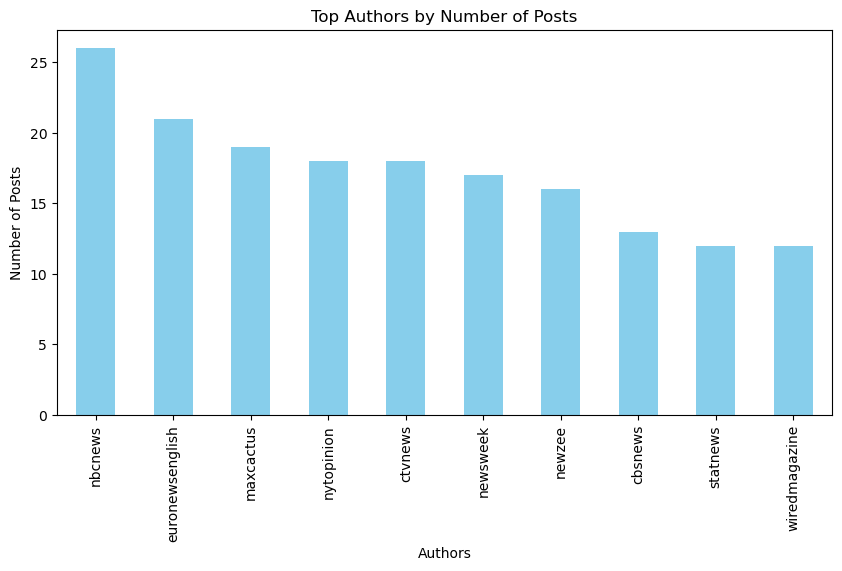

In [634]:
top_authors = clean_data['clean_author'].value_counts().head(10)  # Top 10 authors
top_authors.plot(kind='bar', figsize=(10, 5), title='Top Authors by Number of Posts', color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of Posts')
plt.show()


The bar chart below shows the top 10 authors with the highest performing titles(topics) - From the bar chat we can tell that the newzee has the highest performing title and from the previous bar chart newzee was the 7th highest posting author. This means, authors that post the most does not neccessary have the highest engagement. It is a function of the title of discussion. 

Nbcbews and wiredmagazine that features as part of the top authors with the highest number of post also had 5th and 6th top performing titles. This shows a possiblility that constant posting can impact user enagagement with titles(topics).

Other authors with high perfoming titles(topics) are poltrudes, Exastiken, marji80, nbcnews, wired magazine, asdtyyhfh, hazzman, miolmok, Hazzman, ajn160.

Some of the top performing titles(topics) were authored by individuals.

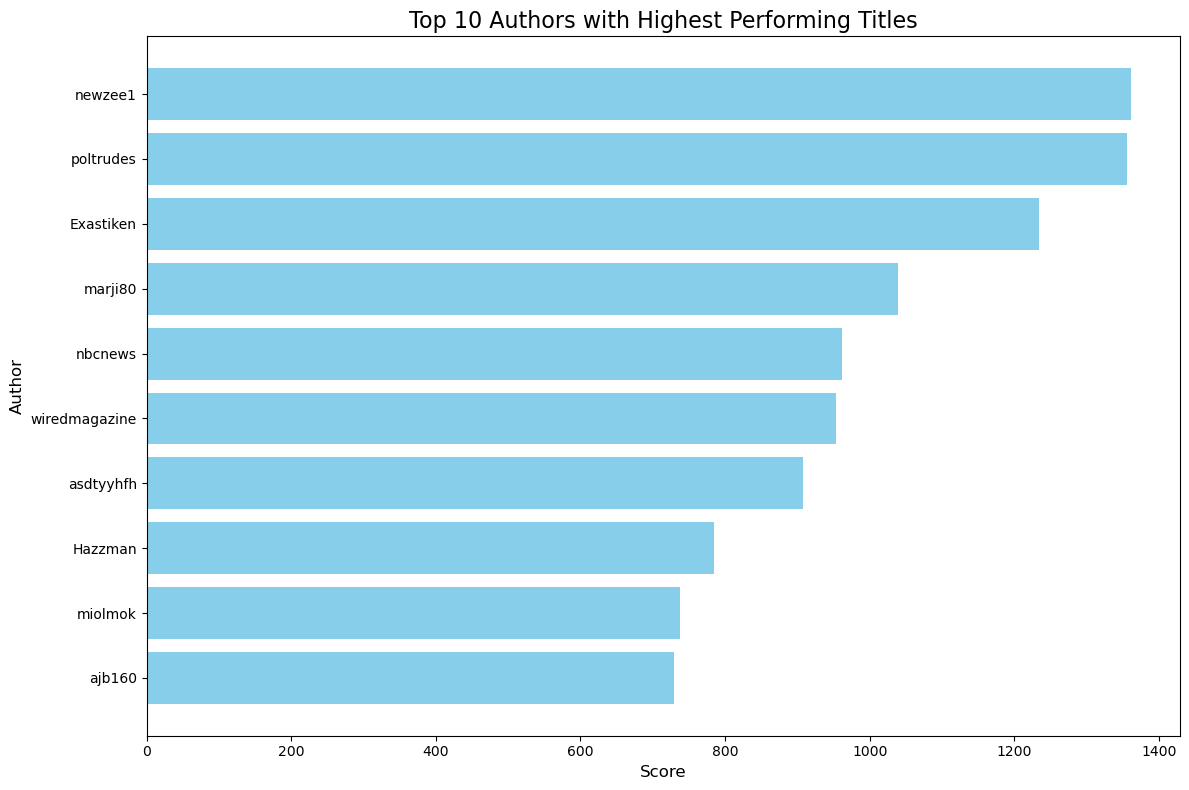

In [627]:
# Find the highest-performing title for each author
top_titles = df.loc[df.groupby('author')['score'].idxmax()]

# Sort by score in descending order and select the top 10
top_10_authors = top_titles.sort_values(by='score', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_authors['author'], top_10_authors['score'], color='skyblue')
plt.xlabel('Score', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.title('Top 10 Authors with Highest Performing Titles', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()



The bar chart below shows the top performing title(topics) based on their score(upvotes).

From the chart, we can see that the highest performing title is "Millions at risk of losing health insurance after Trump's Victory".

The possibility of this post being the highest performing may be linked to the fact that the authors posts often and the discussion is a controversial one inspired by a recently concluded political election.

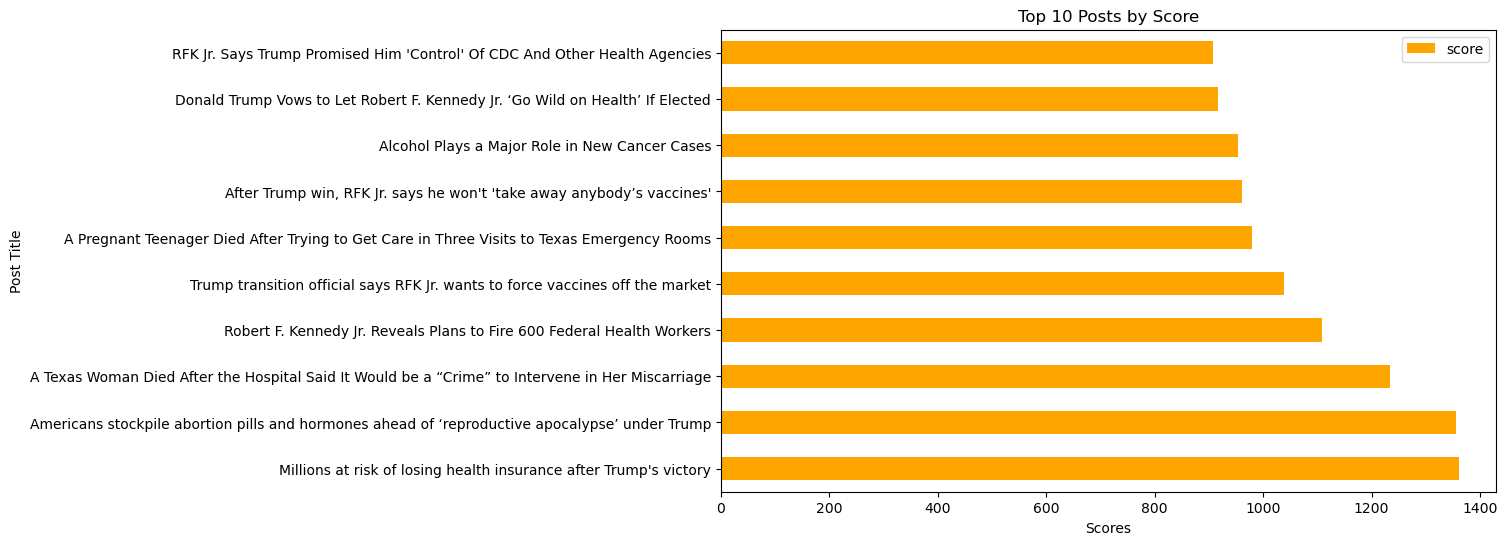

In [649]:
top_posts = health_reddit.nlargest(10, 'score')
top_posts.plot(x='title', y='score', kind='barh', figsize=(10, 6), title='Top 10 Posts by Score', color='orange')
plt.xlabel('Scores')
plt.ylabel('Post Title')
plt.show()


The bar chart below shows the top 10 performing titles(topics) based on the number of comments.

The highest performing title here is "Millions at risk of losing health insurance after Trump's victory" which is also similar to the highest performing post by score.

However, not all posts with high comments have high score(upvtes).

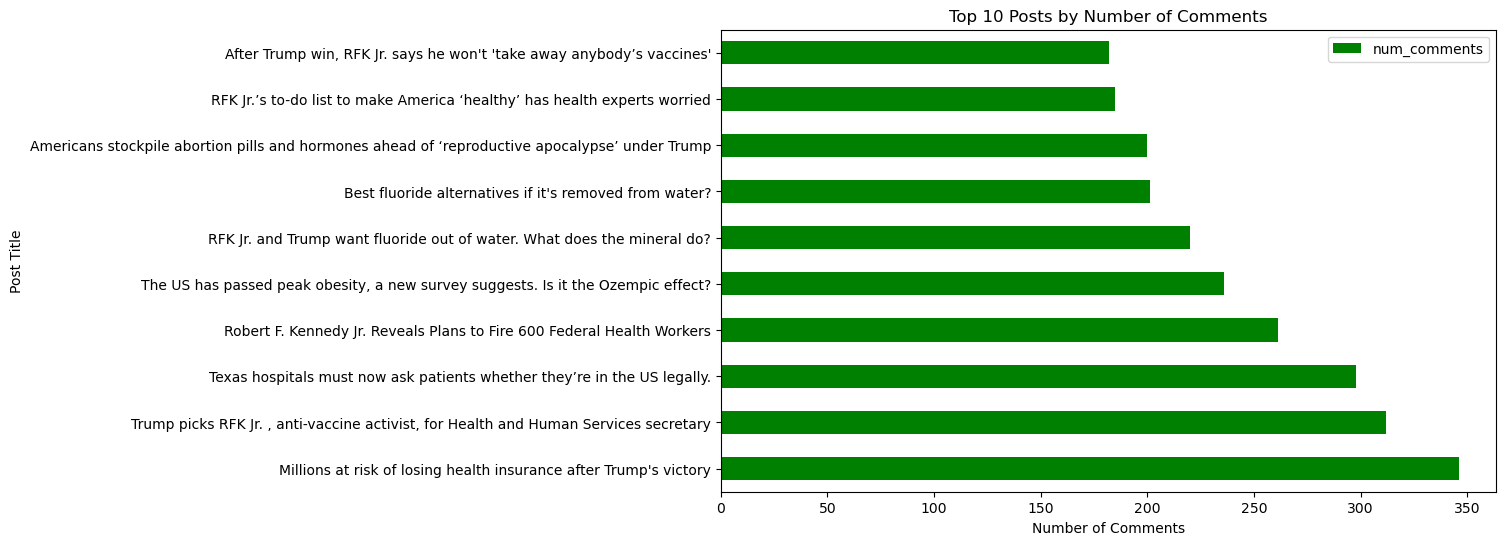

In [653]:
top_comments = health_reddit.nlargest(10, 'num_comments')
top_comments.plot(x='title', y='num_comments', kind='barh', figsize=(10, 6), title='Top 10 Posts by Number of Comments', color='green')
plt.xlabel('Number of Comments')
plt.ylabel('Post Title')
plt.show()


The barchart below shows the top frequently used words in titles.

The top words includes - health, new, study, cancer, flu, jr, bird, says, help, trump.

Some of the words are not medical term but they appeared most in the health titles(topics)

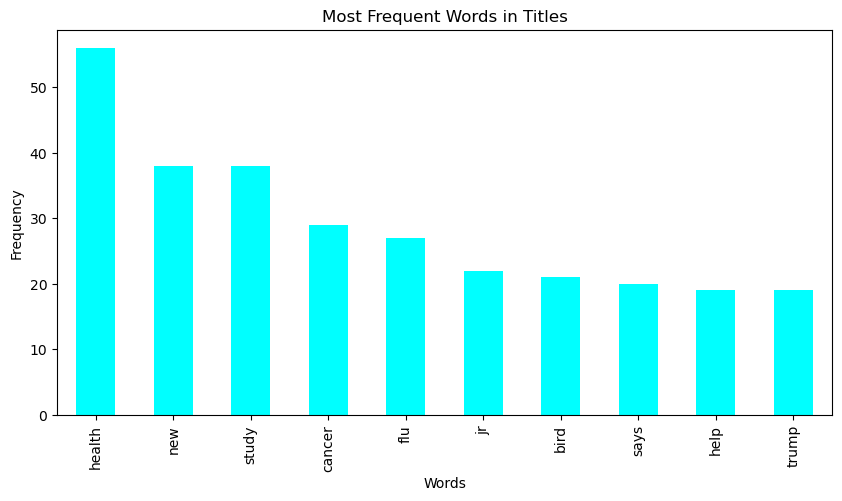

In [264]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(health_reddit['title'])
words = vectorizer.get_feature_names_out()
counts = word_counts.toarray().sum(axis=0)

pd.Series(counts, index=words).sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Most Frequent Words in Titles', color='cyan')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


From the bar chart below word performances is compared between the umber of comments and scores.

Across the different words used, a high score(upvote/engagement) does not mean the post will have a high number of comments.

            Avg Score  Avg Comments
vaccine    231.714286     36.428571
cancer     159.600000     13.333333
bird flu    89.333333      8.142857
treatment   84.100000      3.100000
study      188.307692     25.461538


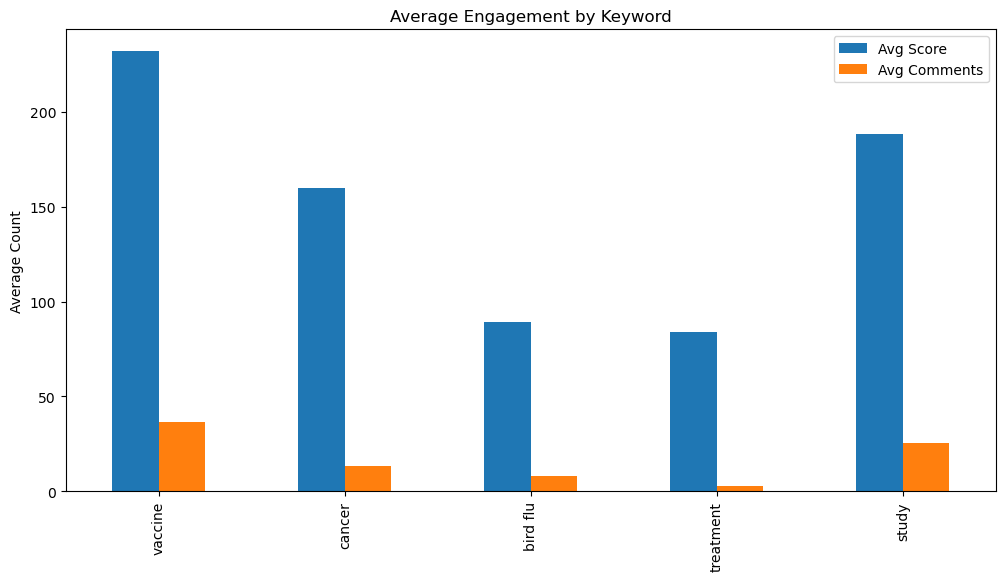

In [287]:
# Calculate average scores and comments by keyword
engagement = {}
for keyword in keywords:
    keyword_posts = clean_data[clean_data['clean_title'].str.contains(keyword, case=False, na=False)]
    avg_score = keyword_posts['score'].mean()
    avg_comments = keyword_posts['num_comments'].mean()
    engagement[keyword] = {'Avg Score': avg_score, 'Avg Comments': avg_comments}

# Convert engagement to a DataFrame
engagement_df = pd.DataFrame(engagement).T

print(engagement_df)

# Visualize engagement
engagement_df.plot(kind='bar', figsize=(12, 6), title='Average Engagement by Keyword')
plt.ylabel('Average Count')
plt.show()


Fromm the trend chart below:

1. 'Vaccine' topics peaked on 22/10/2024 and 08/11/2024
2. Topics on 'cancer' peaked on the 15/11/2024
3. Tpoics related to 'bird flu' also gained attention on the 01/11/2024
4. Other topics like study and treatment did gather so much engagements.

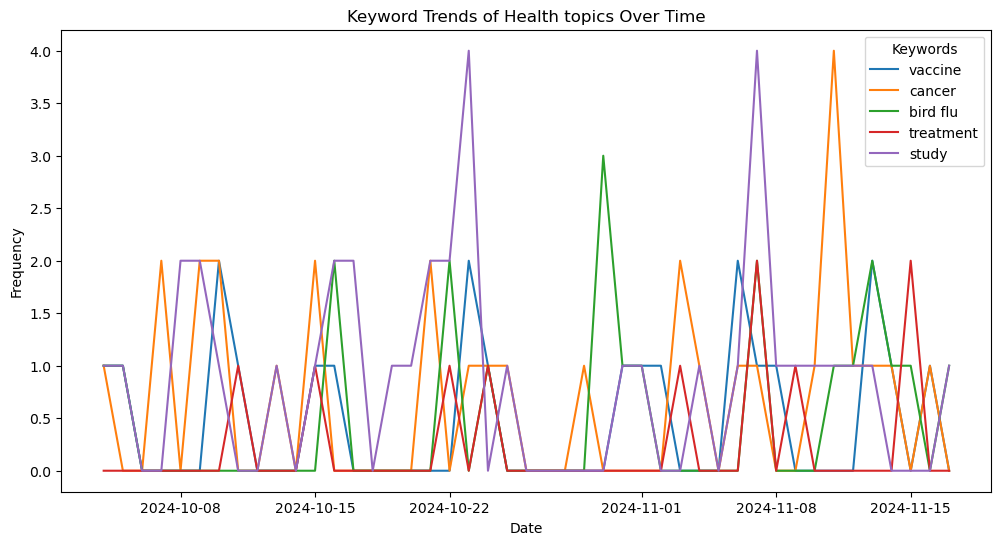

In [285]:
# Define keywords to track
keywords = ['vaccine', 'cancer', 'bird flu', 'treatment', 'study']

# Create a DataFrame to store counts over time
keyword_trends = pd.DataFrame()

for keyword in keywords:
    keyword_trends[keyword] = clean_data['clean_title'].str.contains(keyword, case=False, na=False).groupby(clean_data['date'].dt.date).sum()

# Plot keyword trends
keyword_trends.plot(figsize=(12, 6), title='Keyword Trends of Health topics Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Keywords')
plt.show()



The pie chart below shows the top 10 most active authors based on their number of posts.

Nbcnews has the highest with 25.1% while statnews and wiredmagazine gave 7% respectively

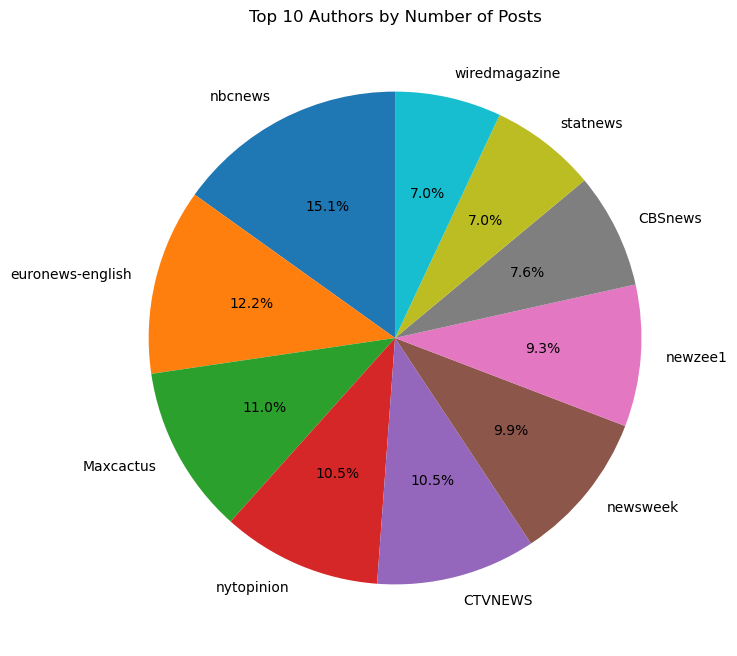

In [605]:
import pandas as pd
import matplotlib.pyplot as plt

author_counts = health_reddit['author'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(author_counts.head(10), labels=author_counts.head(10).index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Authors by Number of Posts')
plt.show()


### Step 4: Ask question about your data


What are the underlying latent topics in the post titles? How do these topics relate to the sentiment of the posts, and what is the sentiment trend over time?

In [671]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure full dataset is used
all_titles = clean_data['clean_title'].dropna().tolist() 

# Perform topic modeling on the full dataset
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
title_vectors = vectorizer.fit_transform(all_titles)

# Apply LDA to the full dataset
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(title_vectors)

# Check the topics
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])



Topic 1:
['covid', 'say', 'help', 'people', 'rfk', 'doctor', 'new', 'jr', 'health', 'vaccine']
Topic 2:
['coli', 'risk', 'american', 'state', 'research', 'linked', 'new', 'study', 'health', 'say']
Topic 3:
['expert', 'risk', 'help', 'brain', 'drug', 'time', 'cancer', 'study', 'new', 'health']
Topic 4:
['health', 'woman', 'coli', 'mcdonalds', 'human', 'disease', 'outbreak', 'bird', 'case', 'flu']
Topic 5:
['risk', 'drug', 'fda', 'health', 'jr', 'gift', 'opinion', 'article', 'trump', 'study']


In [667]:
from textblob import TextBlob

# Assign topics to titles
topic_assignments = lda_model.transform(title_vectors).argmax(axis=1)
df['topic'] = topic_assignments

# Calculate sentiment
df['sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group by topics and calculate average sentiment
topic_sentiment = df.groupby('topic')['sentiment'].mean()
print(topic_sentiment)


topic
0    0.040544
1    0.023001
2    0.059689
3    0.037158
4    0.019288
Name: sentiment, dtype: float64


The sentiment analysis below shows a change in emotional tones in the posts over time, with occasional spikes suggesting reactions to specific events or trending topics. 

Generally, the sentiment shifts between neutral, positive, and negative.

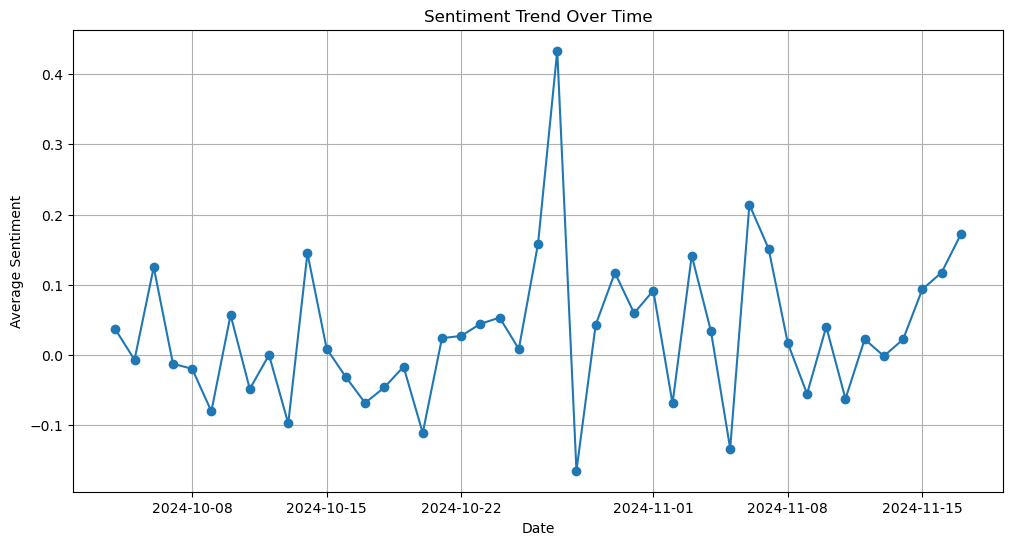

In [688]:
# Group by date
df['date'] = pd.to_datetime(df['date'])
sentiment_trend = df.groupby(df['date'].dt.date)['sentiment'].mean()

# Plot sentiment trend
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()


Is there a correlation between author and score?

<Axes: >

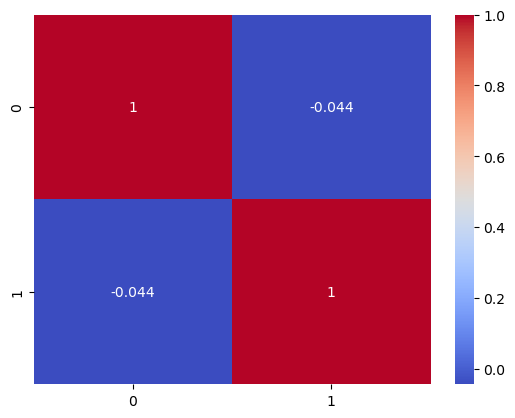

In [707]:
author_activity = clean_data.groupby('clean_author').size()
author_score = clean_data.groupby('clean_author')['score'].mean()
correlation_matrix = np.corrcoef(author_activity, author_score)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


How does the number of comments influence the score (upvotes - downvotes) of a Reddit post?

In [719]:
author_posts[['title', 'num_comments', 'score']]

,title,num_comments,score
10,CDC confirms Oregon’s first human case of bird flu,40,258
19,"Trump picks RFK Jr. , anti-vaccine activist, for Health and Human Services secretary",312,857
24,"FDA employees consider how to handle RFK Jr., including leaving",52,281
54,Sudden syphilis retreat in gay men is most likely tied to preventive antibiotic use,2,44
57,Cutting-edge test uses DNA sequencing to yield diagnoses for some medical mysteries,0,4
87,Study maps how nonprofit religious groups set up facilities near abortion clinics,1,40
106,"After Trump win, RFK Jr. says he won't 'take away anybody’s vaccines'",182,961
116,"Abortion rights ballot measures pass in 7 states, fail in 3 others",11,239
154,Trump team fully embraces RFK Jr.'s vaccine skepticism,22,211
173,CDC says slivered onions are likely cause of McDonald's E. coli infections as cases rise to 90,2,97


In [725]:
highest_performing_post = df.sort_values(by='score', ascending=False).iloc[0]

# Display the title & score of the highest performing post
print(f"Highest Performing Post Title: {highest_performing_post['title']}")
print(f"Score: {highest_performing_post['score']}")


Highest Performing Post Title: Millions at risk of losing health insurance after Trump's victory
Score: 1361


In [722]:
# Sort the dataset by 'num_comments' in descending order to find the post with most comments
most_commented_post = df.sort_values(by='num_comments', ascending=False).iloc[0]

# Display the title and number of comments of the post
print(f"Most Commented Post Title: {most_commented_post['title']}")
print(f"Number of Comments: {most_commented_post['num_comments']}")


Most Commented Post Title: Millions at risk of losing health insurance after Trump's victory
Number of Comments: 346


In [729]:
least_performing_post = df.sort_values(by='score', ascending=True).iloc[0]

# Display the title and score of the least performing post
print(f"Least Performing Post Title: {least_performing_post['title']}")
print(f"Score: {least_performing_post['score']}")


Least Performing Post Title: Doctor has warning over diet drinks, especially for women
Score: 0


In [552]:
least_5_posts = df.sort_values(by='score', ascending=True).head(5)
print(least_5_posts[['title', 'score']])


                                                 title  score
307  Doctor has warning over diet drinks, especiall...      0
356  I’m a doctor — here’s why you should never pee...      0
6    Are standing desks good for you? The answer is...      0
277  5 Gastroenterologists on the 1 Thing You Shoul...      0
71   Opinion | Wellness Should be Just a Hobby (Gif...      0


### Step 5: Summarise and write a conclusion 